In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np

### Import the train data, test data & read the data

In [2]:
data = pd.read_csv('train_data-1611220940820.csv')

In [3]:
testdata = pd.read_csv('test_data-1611220982388.csv')

In [4]:
data.shape

(76529, 11)

In [5]:
testdata.shape

(19133, 10)

In [6]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [7]:
testdata.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

In [8]:
data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [9]:
testdata.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [10]:
data.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [11]:
testdata.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4
19132,84390778936647,14500864,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,40.0,2017-01-12 21:24:24+00:00,2


In [12]:
data.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


In [13]:
testdata.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133,19133.000000,19133,19133,19133,19133.000000,19133,19133.000000
unique,NaN,NaN,6,NaN,8,1,4,NaN,19090,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN
freq,NaN,NaN,7651,NaN,9099,19133,11375,NaN,5,NaN
mean,7.037622e+14,1.261609e+07,NaN,58656.424084,NaN,NaN,NaN,140.886995,NaN,2.257043
std,7.946458e+14,1.228365e+07,NaN,36692.507399,NaN,NaN,NaN,2883.975048,NaN,0.735934
min,1.000000e+00,3.600000e+01,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000
25%,4.313645e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000
50%,3.585617e+14,9.922500e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000
75%,1.184018e+15,1.796064e+07,NaN,78890.000000,NaN,NaN,NaN,60.000000,NaN,2.000000


In [14]:
data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [15]:
testdata.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

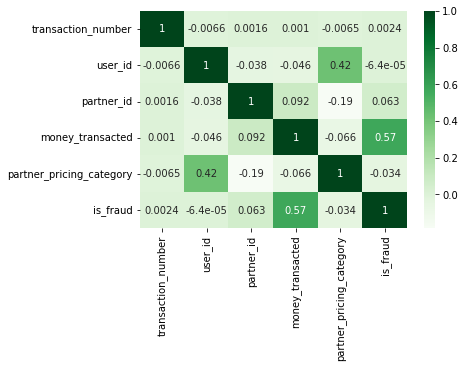

In [16]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='Greens',annot=True)

In [17]:
obj_attr=data.select_dtypes('object').columns
for i in obj_attr:
  print(data[i].nunique())
  print(data[i].value_counts())

6
sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64
9
cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64
1
IND_INR    76529
Name: country, dtype: int64
4
other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64
75811
2016-12-24 16:30:13+00:00    12
2016-11-15 07:03:26+00:00     7
2016-12-24 16:30:12+00:00     6
2017-01-04 04:29:41+00:00     4
2017-02-01 10:58:34+00:00     4
                             ..
2016-11-19 06:18:42+00:00     1
2016-11-21 08:57:53+00:00     1
2016-12-13 08:52:02+00:00     1
2016-11-26 11:07:53+00:00     1
2017-01-11 19:08:18+00:00     1
Name: transaction_initiation, Leng

In [18]:
obj_attr=data.select_dtypes('object').columns
for i in obj_attr:
  print(testdata[i].nunique())
  print(testdata[i].value_counts())

6
sbi_atm_cum_debit_card        7651
e_wallet_payments             6802
visa_master_debit_cards       2899
other_debit_cards             1148
visa_master_credit_cards       630
unified_payments_interface       3
Name: payment_method, dtype: int64
8
cat_1    9099
cat_2    9008
cat_3     384
cat_4     303
cat_5     253
cat_7      51
cat_6      29
cat_8       6
Name: partner_category, dtype: int64
1
IND_INR    19133
Name: country, dtype: int64
4
other_pcs          11375
android_devices     7479
ios_devices          172
windows_pcs          107
Name: device_type, dtype: int64
19090
2016-12-24 16:30:13+00:00    5
2016-11-15 07:03:27+00:00    3
2017-02-10 06:17:49+00:00    2
2017-02-01 12:06:41+00:00    2
2016-12-23 12:07:37+00:00    2
                            ..
2017-02-01 05:47:20+00:00    1
2016-12-07 06:07:40+00:00    1
2017-01-04 09:59:06+00:00    1
2017-01-08 11:04:18+00:00    1
2017-01-12 21:24:24+00:00    1
Name: transaction_initiation, Length: 19090, dtype: int64


In [19]:
int_attr=data.select_dtypes('int64').columns
for i in int_attr:
  print(data[i].nunique())
  print(data[i].value_counts())

76529
144703125000        1
1397377534615399    1
375554430505792     1
97685557616375      1
1927875222034579    1
                   ..
1947973286169       1
233676600572584     1
2003664131986509    1
1251471920359744    1
1051344513778987    1
Name: transaction_number, Length: 76529, dtype: int64
3594
53919649    3240
13205956    1656
418609      1530
1201216      623
16265089     622
            ... 
567009         1
20539024       1
21613201       1
26347689       1
27952369       1
Name: user_id, Length: 3594, dtype: int64
23
47334     26105
23667     19526
78890     12273
118335     9546
7889       2317
31556      1892
165669     1216
86779      1121
149891      767
110446      640
102557      231
15778       189
157780      165
63112       159
189336      146
173558       89
55223        75
213003       25
39445        19
71001        15
126224       10
94668         2
181447        1
Name: partner_id, dtype: int64
4
2    63899
4    10833
1     1497
0      300
Name: partner_pr

In [20]:
data.drop(["country","transaction_number"],axis=1,inplace=True)

In [21]:
testdata.drop(["country","transaction_number"],axis=1,inplace=True)

In [22]:
data.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [23]:
testdata.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [24]:
data.isnull().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [25]:
testdata.isnull().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

In [26]:
cat_attr=(["payment_method","partner_category","device_type"])
data[cat_attr]=data[cat_attr].astype('category')

In [27]:
cat_attr=(["payment_method","partner_category","device_type"])
testdata[cat_attr]=testdata[cat_attr].astype('category')

In [28]:
data.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
is_fraud                       int64
dtype: object

In [29]:
testdata.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
dtype: object

### converting transaction_initiation into dateandtime data type

In [30]:
data['transaction_initiation'] = pd.to_datetime(data['transaction_initiation'])

In [31]:
testdata['transaction_initiation'] = pd.to_datetime(testdata['transaction_initiation'])

In [32]:
data['transaction_initiation'].dtypes

datetime64[ns, UTC]

In [33]:
testdata['transaction_initiation'].dtypes

datetime64[ns, UTC]

### Using transaction_initiation to create colums [Month, Day, Year, Time]

In [34]:
data['year'] = data['transaction_initiation'].dt.year
data['month'] = data['transaction_initiation'].dt.month
data['day'] = data['transaction_initiation'].dt.day
data['time'] = data['transaction_initiation'].dt.time
data.drop(columns='transaction_initiation', axis='column', inplace=True)

In [35]:
testdata['year'] = testdata['transaction_initiation'].dt.year
testdata['month'] = testdata['transaction_initiation'].dt.month
testdata['day'] = testdata['transaction_initiation'].dt.day
testdata['time'] = testdata['transaction_initiation'].dt.time
testdata.drop(columns='transaction_initiation', axis='column', inplace=True)

In [36]:
data

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day,time
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,2016,11,15,19:16:12
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,7,07:58:09
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,11,16:15:44
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,16,17:04:42
...,...,...,...,...,...,...,...,...,...,...,...,...
76524,19686969,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,0,2016,11,30,13:40:45
76525,11662225,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2017,1,8,08:35:31
76526,374544,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-3.5,2,0,2016,12,26,21:47:08
76527,1687401,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-20.0,2,0,2016,12,11,13:44:06


In [37]:
testdata

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,year,month,day,time
0,3802500,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28,14:44:37
1,200704,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14,17:49:48
2,25150225,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21,10:18:11
3,21827584,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16,13:25:10
4,576081,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9,12:47:28
...,...,...,...,...,...,...,...,...,...,...,...
19128,13235044,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2017,1,1,13:02:16
19129,12257001,e_wallet_payments,78890,cat_2,other_pcs,30.0,2,2016,12,26,19:41:23
19130,5958481,visa_master_debit_cards,23667,cat_2,other_pcs,20.0,4,2016,12,24,04:29:06
19131,53919649,sbi_atm_cum_debit_card,78890,cat_2,android_devices,-500.0,4,2016,12,4,15:38:47


In [38]:
data.drop(['time'],axis=1,inplace=True)

In [39]:
testdata.drop(['time'],axis=1,inplace=True)

In [40]:
data.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
year                           int64
month                          int64
day                            int64
dtype: object

In [41]:
testdata.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
year                           int64
month                          int64
day                            int64
dtype: object

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
data = pd.get_dummies(data)

In [44]:
data.head()

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,payment_method_e_wallet_payments,payment_method_other_debit_cards,...,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,17539344,47334,-5.0,2,0,2016,11,15,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24710841,78890,100.0,2,0,2017,1,11,1,0,...,0,0,0,0,0,0,0,0,1,0
2,24265476,78890,50.0,2,0,2016,12,7,1,0,...,0,0,0,0,0,0,0,0,1,0
3,10240000,102557,1000.0,2,0,2017,1,11,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5880625,118335,200.0,2,0,2016,11,16,0,1,...,0,0,0,0,0,0,0,0,1,0


In [45]:
data.columns

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day', 'payment_method_e_wallet_payments',
       'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_1',
       'partner_category_cat_2', 'partner_category_cat_3',
       'partner_category_cat_4', 'partner_category_cat_5',
       'partner_category_cat_6', 'partner_category_cat_7',
       'partner_category_cat_8', 'partner_category_cat_9',
       'device_type_android_devices', 'device_type_ios_devices',
       'device_type_other_pcs', 'device_type_windows_pcs'],
      dtype='object')

In [46]:
testdata = pd.get_dummies(testdata)

In [47]:
testdata.head()

,user_id,partner_id,money_transacted,partner_pricing_category,year,month,day,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,...,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,3802500,118335,200.0,2,2016,12,28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,200704,23667,20.0,2,2016,12,14,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25150225,47334,-100.0,2,2017,1,21,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,21827584,78890,200.0,1,2017,1,16,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,576081,23667,100.0,2,2017,2,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
testdata.columns

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day', 'payment_method_e_wallet_payments',
       'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_1',
       'partner_category_cat_2', 'partner_category_cat_3',
       'partner_category_cat_4', 'partner_category_cat_5',
       'partner_category_cat_6', 'partner_category_cat_7',
       'partner_category_cat_8', 'device_type_android_devices',
       'device_type_ios_devices', 'device_type_other_pcs',
       'device_type_windows_pcs'],
      dtype='object')

### split the data for training and testing

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
y=data["is_fraud"]
X=data.drop(['is_fraud','partner_category_cat_9'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 25)
(15306, 25)
(61223,)
(15306,)


In [52]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')

### Standardizing the data

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr=X_test.select_dtypes(['int64','float64']).columns
print(num_attr)
print(num_attr)

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')
Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')


In [55]:
scaler = StandardScaler()

In [56]:
X_train[num_attr]=scaler.fit_transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [57]:
print(X_train.shape)
print(X_test.shape)

(61223, 25)
(15306, 25)


#### Model Building

### Logistic Regression model

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()

In [60]:
lr.fit(X_train,y_train)

LogisticRegression()

In [61]:
X_train_pred=lr.predict(X_train)
X_test_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, f1_score

In [63]:
accuracy_score(y_train,X_train_pred)

0.9984319618444049

In [64]:
accuracy_score(y_test,X_test_pred)

0.9976479811838495

In [65]:
f1_score(y_train,X_train_pred)

0.4545454545454545

In [66]:
f1_score(y_test,X_test_pred)

0.28

### Decissiontree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DT=DecisionTreeClassifier()

In [69]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
X_train_pred=DT.predict(X_train)
X_test_pred=DT.predict(X_test)

In [71]:
f1_score(y_train,X_train_pred)

0.9870129870129869

In [72]:
f1_score(y_test,X_test_pred)

0.9014084507042254

### Rnadom forest classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
RF=RandomForestClassifier()

In [75]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
X_train_pred=RF.predict(X_train)
X_test_pred=RF.predict(X_test)

In [77]:
f1_score(y_train,X_train_pred)

0.9872340425531915

In [78]:
f1_score(y_test,X_test_pred)

0.8059701492537312

### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
KNN=KNeighborsClassifier()

In [81]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
X_train_pred=KNN.predict(X_train)
X_test_pred=KNN.predict(X_test)

In [83]:
f1_score(y_train,X_train_pred)

0.8679245283018867

In [84]:
f1_score(y_test,X_test_pred)

0.8656716417910447

### Predicting the Original Test data with Best Model

In [85]:
for i in data:
  print(i)

user_id
partner_id
money_transacted
partner_pricing_category
is_fraud
year
month
day
payment_method_e_wallet_payments
payment_method_other_debit_cards
payment_method_sbi_atm_cum_debit_card
payment_method_unified_payments_interface
payment_method_visa_master_credit_cards
payment_method_visa_master_debit_cards
partner_category_cat_1
partner_category_cat_2
partner_category_cat_3
partner_category_cat_4
partner_category_cat_5
partner_category_cat_6
partner_category_cat_7
partner_category_cat_8
partner_category_cat_9
device_type_android_devices
device_type_ios_devices
device_type_other_pcs
device_type_windows_pcs


In [86]:
for j in testdata:
  print(j)

user_id
partner_id
money_transacted
partner_pricing_category
year
month
day
payment_method_e_wallet_payments
payment_method_other_debit_cards
payment_method_sbi_atm_cum_debit_card
payment_method_unified_payments_interface
payment_method_visa_master_credit_cards
payment_method_visa_master_debit_cards
partner_category_cat_1
partner_category_cat_2
partner_category_cat_3
partner_category_cat_4
partner_category_cat_5
partner_category_cat_6
partner_category_cat_7
partner_category_cat_8
device_type_android_devices
device_type_ios_devices
device_type_other_pcs
device_type_windows_pcs


In [87]:
bestmodel=KNN.predict(testdata)

In [88]:
bestmodel[0:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
predictions=pd.DataFrame(bestmodel, columns=['is_fraud']).to_csv('bestmodel.csv',index=False)